# import libraries 

In [277]:
import pandas as pd
import numpy as np
import os
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import  RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import OneHotEncoder




# read the dataset

In [278]:
train_path = os.path.join(os.getcwd(),'..','dataset','train.csv')
df = pd.read_csv(train_path)
df.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True

In [279]:
test_path = os.path.join(os.getcwd(),'..','dataset','test.csv')
df_test = pd.read_csv(test_path)

# EDA

In [280]:
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [281]:
df = df.dropna()

In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6606 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   6606 non-null   object 
 1   HomePlanet    6606 non-null   object 
 2   CryoSleep     6606 non-null   object 
 3   Cabin         6606 non-null   object 
 4   Destination   6606 non-null   object 
 5   Age           6606 non-null   float64
 6   VIP           6606 non-null   object 
 7   RoomService   6606 non-null   float64
 8   FoodCourt     6606 non-null   float64
 9   ShoppingMall  6606 non-null   float64
 10  Spa           6606 non-null   float64
 11  VRDeck        6606 non-null   float64
 12  Name          6606 non-null   object 
 13  Transported   6606 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 729.0+ KB


In [283]:
df.describe()

Age  RoomService     FoodCourt  ShoppingMall           Spa  \
count  6606.000000  6606.000000   6606.000000   6606.000000   6606.000000   
mean     28.894036   222.991674    478.958523    178.356494    313.161520   
std      14.533429   644.987936   1678.592291    576.328407   1144.016291   
min       0.000000     0.000000      0.000000      0.000000      0.000000   
25%      19.000000     0.000000      0.000000      0.000000      0.000000   
50%      27.000000     0.000000      0.000000      0.000000      0.000000   
75%      38.000000    49.000000     82.750000     30.000000     65.000000   
max      79.000000  9920.000000  29813.000000  12253.000000  22408.000000   

             VRDeck  
count   6606.000000  
mean     303.780048  
std     1127.142166  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       52.000000  
max    20336.000000

In [284]:
df['Transported'].value_counts()

Transported
True     3327
False    3279
Name: count, dtype: int64

# preprocessing


In [285]:
df.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True

In [286]:
X = df.drop(columns=["Transported","PassengerId","Name","Cabin","Destination","RoomService"], axis=1)
y= df["Transported"]

In [287]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(5945, 8) (661, 8) (5945,) (661,)


In [288]:
X_test = df_test.drop(columns=["PassengerId","Name","Cabin","Destination","RoomService"], axis=1)
print(X_test.shape)

(4277, 8)


In [289]:
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()
print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)


Numeric features: ['Age', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
Categorical features: ['HomePlanet', 'CryoSleep', 'VIP']


In [290]:
#pipeline
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
    
])
categ_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder( handle_unknown='ignore', sparse_output=False , drop='first'))
])

#combine pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, numeric_features),
        ('cat', categ_pipeline, categorical_features)
    ]
)

# apply
X_train_final = preprocessor.fit_transform(X_train)
X_val_final = preprocessor.transform(X_val)
X_test_final = preprocessor.transform(X_test)


In [291]:
X.head()

HomePlanet CryoSleep   Age    VIP  FoodCourt  ShoppingMall     Spa  VRDeck
0     Europa     False  39.0  False        0.0           0.0     0.0     0.0
1      Earth     False  24.0  False        9.0          25.0   549.0    44.0
2     Europa     False  58.0   True     3576.0           0.0  6715.0    49.0
3     Europa     False  33.0  False     1283.0         371.0  3329.0   193.0
4      Earth     False  16.0  False       70.0         151.0   565.0     2.0

In [292]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', RobustScaler())]),
                                 ['Age', 'FoodCourt', 'ShoppingMall', 'Spa',
                                  'VRDeck']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['HomePlanet', 'CryoSleep', 'VIP'])])

In [293]:
X_train_final.shape, y_train.shape

((5945, 9), (5945,))

In [294]:
ARTIFACT_FOLDER_PATH = os.path.join(os.getcwd(), "..", "artifacts")
os.makedirs(ARTIFACT_FOLDER_PATH, exist_ok=True)

In [295]:
joblib.dump(preprocessor, os.path.join(ARTIFACT_FOLDER_PATH, "preprocessor.pkl"))

['d:\\Me\\ML PROJECTS\\space-ship competetion\\notebooks\\..\\artifacts\\preprocessor.pkl']

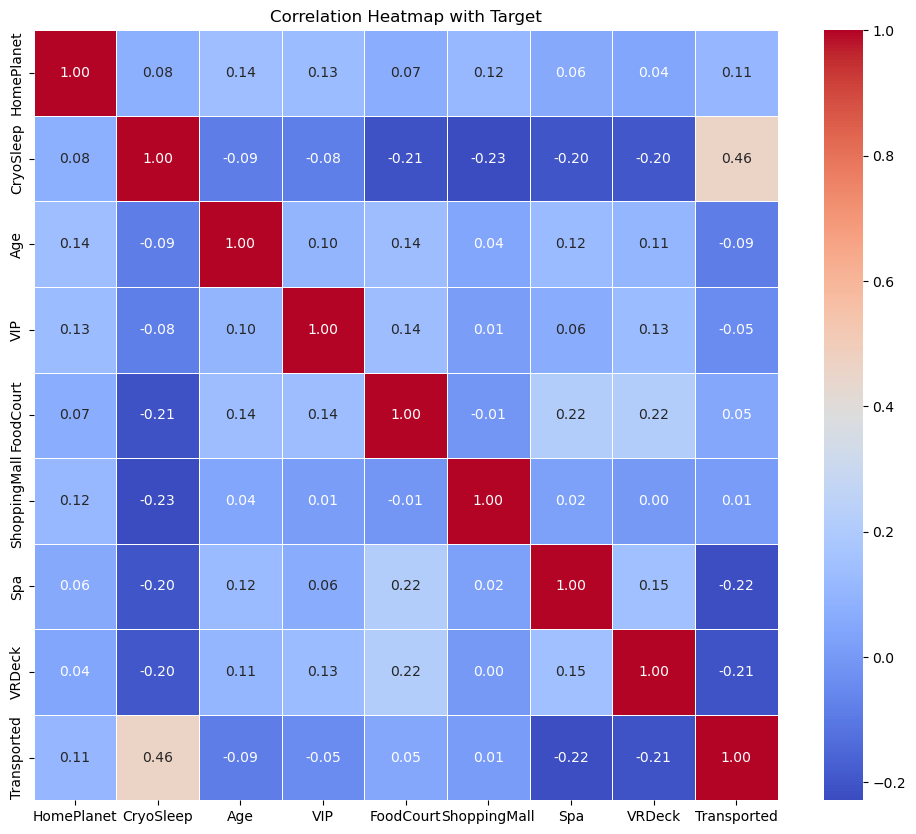

In [296]:
# Make a copy to avoid messing up the original
X_corr = X.copy()

# Temporarily encode categorical features to numerical using .cat.codes
for col in X_corr.select_dtypes(include='object').columns:
    X_corr[col] = X_corr[col].astype('category').cat.codes

# Add the target variable for correlation with it
X_corr['Transported'] = y_train.astype('int')

# Compute the correlation matrix
corr_matrix = X_corr.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap with Target')
plt.show()

In [297]:
target_corr = corr_matrix['Transported'].drop('Transported').sort_values(ascending=False)
print("Top correlated features with Transported:")
print(target_corr.head(5))


Top correlated features with Transported:
CryoSleep       0.461740
HomePlanet      0.110013
FoodCourt       0.049291
ShoppingMall    0.008670
VIP            -0.045480
Name: Transported, dtype: float64


In [298]:
print(target_corr.tail(5))


ShoppingMall    0.008670
VIP            -0.045480
Age            -0.085677
VRDeck         -0.207886
Spa            -0.219771
Name: Transported, dtype: float64


# RandomForestClassifier

In [299]:
rf = RandomForestClassifier(n_estimators=300, random_state=42, max_depth=7 , min_samples_split=2, min_samples_leaf=1, max_features='sqrt', bootstrap=True)
rf.fit(X_train_final, y_train)


RandomForestClassifier(max_depth=7, n_estimators=300, random_state=42)

# evaluation 

In [300]:
# accuracy
accuracy_rf = accuracy_score(y_val, rf.predict(X_val_final))
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

Random Forest Accuracy: 0.8215


In [301]:
# classification report
report_rf = classification_report(y_val, rf.predict(X_val_final), output_dict=True)
report_rf = pd.DataFrame(report_rf).transpose()
report_rf

precision    recall  f1-score     support
False          0.810398  0.825545  0.817901  321.000000
True           0.832335  0.817647  0.824926  340.000000
accuracy       0.821483  0.821483  0.821483    0.821483
macro avg      0.821366  0.821596  0.821414  661.000000
weighted avg   0.821682  0.821483  0.821514  661.000000

In [302]:
# xgboost
import xgboost as xgb
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=50, random_state=100, max_depth=3, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_final, y_train)


c:\Users\seif\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:18:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, random_state=100, ...)

In [303]:
# evaluate
accuracy_xgb = accuracy_score(y_val, xgb_model.predict(X_val_final))
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")

XGBoost Accuracy: 0.8169


In [304]:
# gradient boosting
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators=50, random_state=300, max_depth=5)
gb_model.fit(X_train_final, y_train)
# evaluate
accuracy_gb = accuracy_score(y_val, gb_model.predict(X_val_final))
print(f"Gradient Boosting Accuracy: {accuracy_gb:.4f}")

Gradient Boosting Accuracy: 0.8230


# submission

In [305]:
y_pred_test = rf.predict(X_test_final)


In [306]:
submission = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],
    'Transported': y_pred_test
})
submission['Transported'] = submission['Transported'].astype(bool)
submission.to_csv(os.path.join(ARTIFACT_FOLDER_PATH, 'submission.csv'), index=False)